In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("H:/Data science/Practice/27 november/KNN Assignment/iphone_purchase_records.csv")

In [3]:
data

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [64]:
df = data.copy()

In [5]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [6]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
df.corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


<AxesSubplot:>

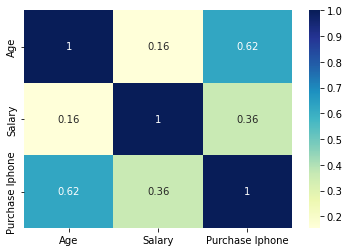

In [9]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [10]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

<AxesSubplot:ylabel='Age'>

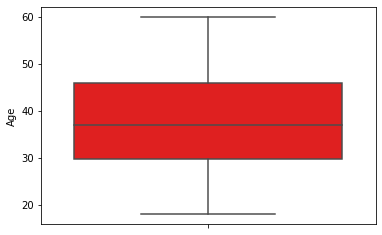

In [11]:
sns.boxplot(y='Age',color='red',data=df)

<AxesSubplot:ylabel='Salary'>

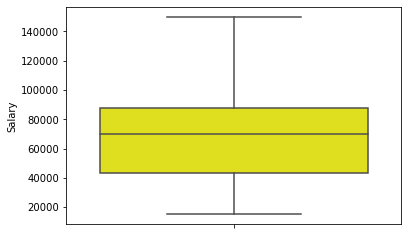

In [12]:
sns.boxplot(y='Salary',color='yellow',data=df)

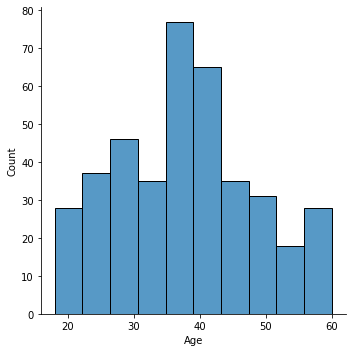

In [102]:
sns.displot(x='Age',data=df)

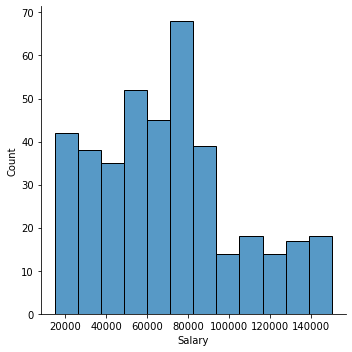

In [103]:
sns.displot(x='Salary',data=df)

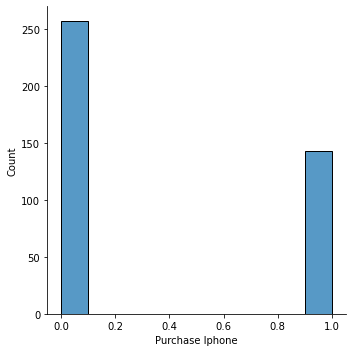

In [104]:
sns.displot(x='Purchase Iphone',data=df)

In [13]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [14]:
df.Age.value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

In [15]:
df.Salary.value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: Salary, Length: 117, dtype: int64

In [16]:
df['Purchase Iphone'].value_counts()

0    257
1    143
Name: Purchase Iphone, dtype: int64

In [17]:
df.groupby(['Gender']).mean()

,Age,Salary,Purchase Iphone
Gender,,,
Female,38.411765,71759.803922,0.377451
Male,36.867347,67642.857143,0.336735


<AxesSubplot:xlabel='Gender', ylabel='Age'>

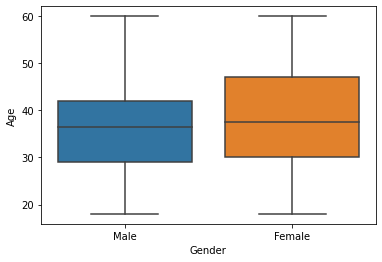

In [18]:
sns.boxplot(x='Gender',y='Age',data=df)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

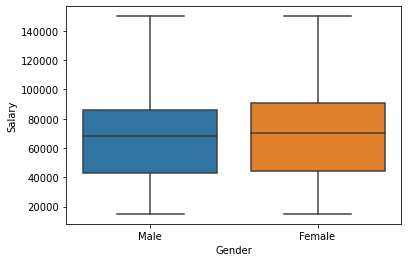

In [19]:
sns.boxplot(x='Gender',y='Salary',data=df)

In [20]:
female = df[df['Gender']=='Female']
female

,Gender,Age,Salary,Purchase Iphone
2,Female,26,43000,0
3,Female,27,57000,0
6,Female,27,84000,0
7,Female,32,150000,1
9,Female,35,65000,0
...,...,...,...,...
392,Female,45,45000,1
394,Female,39,59000,0
395,Female,46,41000,1
397,Female,50,20000,1


In [21]:
male = df[df['Gender']=='Male']
male

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
4,Male,19,76000,0
5,Male,27,58000,0
8,Male,25,33000,0
...,...,...,...,...
390,Male,48,33000,1
391,Male,47,23000,1
393,Male,60,42000,1
396,Male,51,23000,1


In [22]:
female.describe()

,Age,Salary,Purchase Iphone
count,204.000000,204.000000,204.000000
mean,38.411765,71759.803922,0.377451
std,10.859019,35595.236189,0.485942
min,18.000000,15000.000000,0.000000
25%,30.000000,44000.000000,0.000000
50%,37.500000,70500.000000,0.000000
75%,47.000000,90750.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
male.describe()

,Age,Salary,Purchase Iphone
count,196.000000,196.000000,196.000000
mean,36.867347,67642.857143,0.336735
std,10.043636,32421.819181,0.473804
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,36.500000,68000.000000,0.000000
75%,42.000000,86000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [24]:
female['Purchase Iphone'].value_counts()

0    127
1     77
Name: Purchase Iphone, dtype: int64

In [25]:
(77*100)/204

37.745098039215684

In [26]:
male['Purchase Iphone'].value_counts()

0    130
1     66
Name: Purchase Iphone, dtype: int64

In [27]:
(66*100)/196

33.673469387755105

In [28]:
female['Age'].unique()

array([26, 27, 32, 35, 48, 47, 45, 21, 28, 33, 31, 24, 18, 29, 23, 59, 22,
       20, 30, 19, 38, 39, 37, 36, 40, 41, 34, 58, 55, 52, 46, 60, 42, 53,
       50, 56, 51, 57, 44, 43, 49, 54], dtype=int64)

In [29]:
male['Age'].unique()

array([19, 35, 27, 25, 20, 32, 18, 29, 47, 45, 46, 48, 49, 31, 30, 23, 28,
       22, 24, 34, 39, 26, 21, 38, 37, 42, 40, 36, 41, 33, 52, 59, 60, 56,
       57, 55, 58, 53, 54, 43, 51], dtype=int64)

# Model_1

In [30]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [65]:
x = df[['Age', 'Salary']]
y = df[['Purchase Iphone']]

In [66]:
import sklearn.neighbors as sn
import sklearn.metrics as sm

In [67]:
acc=[]
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model= knn.fit(x,y)
    pred_y = model.predict(x)
    acc.append(sm.accuracy_score(pred_y,y))
    print('k=',i,acc)
    
    

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [0.995]
k= 2 [0.995, 0.9]
k= 3 [0.995, 0.9, 0.8975]
k= 4 [0.995, 0.9, 0.8975, 0.8625]
k= 5 [0.995, 0.9, 0.8975, 0.8625, 0.8725]
k= 6 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625]
k= 7 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87]
k= 8 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475]
k= 9 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725]
k= 10 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475]
k= 11 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325]
k= 12 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825]
k= 13 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845]
k= 14 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425]
k= 15 [0.995, 0.9, 0.8975, 0.8625, 0.8725, 0.8625, 0.87, 0.8475, 0.8725, 0.8475, 0.8325, 0.825, 0.845, 0.8425, 0.8325]
k= 16 [0.995, 0.9, 0.8975,

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [68]:
max(acc)

0.995

In [69]:
k=acc.index(max(acc))+1

In [70]:
k

1

In [71]:
knn=sn.KNeighborsClassifier(n_neighbors=1)
model= knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


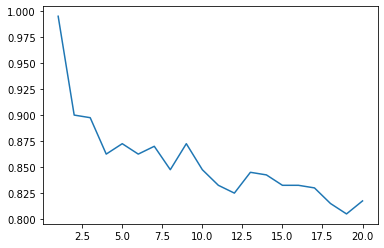

In [73]:
plt.plot(range(1,21),acc)

# Model_2(With Gender maping)

In [74]:
m=df.groupby('Gender')['Purchase Iphone'].mean()
m

Gender
Female    0.377451
Male      0.336735
Name: Purchase Iphone, dtype: float64

In [75]:
q=m.sum()
q

0.7141856742697079

In [76]:
(m/q)*100

Gender
Female    52.850539
Male      47.149461
Name: Purchase Iphone, dtype: float64

In [77]:
d = {'Female':52.850539,'Male':47.149461}

In [78]:
df['gm']=df['Gender'].map(d)

In [79]:
x = df[['Age', 'Salary','gm']]
y = df[['Purchase Iphone']]

In [80]:
acc=[]
for i in range(1,20):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model= knn.fit(x,y)
    pred_y = model.predict(x)
    acc.append(sm.accuracy_score(pred_y,y))
    print('k=',i,acc)
    

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [0.9975]
k= 2 [0.9975, 0.8975]
k= 3 [0.9975, 0.8975, 0.8975]
k= 4 [0.9975, 0.8975, 0.8975, 0.8625]
k= 5 [0.9975, 0.8975, 0.8975, 0.8625, 0.875]
k= 6 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625]
k= 7 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87]
k= 8 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855]
k= 9 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865]
k= 10 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475]
k= 11 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835]
k= 12 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275]
k= 13 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425]
k= 14 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425, 0.8475]
k= 15 [0.9975, 0.8975, 0.8975, 0.8625, 0.875, 0.8625, 0.87, 0.855, 0.865, 0.8475, 0.835, 0.8275, 0.8425, 0.8475, 0

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [81]:
max(acc)

0.9975

In [82]:
k=acc.index(max(acc))+1

In [83]:
k

1

In [84]:
knn=sn.KNeighborsClassifier(n_neighbors=1)
model= knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


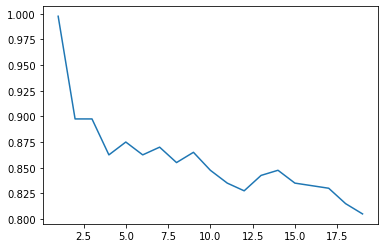

In [86]:
plt.plot(range(1,20),acc)

### Here i have mapped the male and female with percentage of total average of purchase iphone. but it is not nacessary to do this way in kkn method. you can map male and female any 2 different number. basically mapping does that add one more dimension and categorise male and female into number so we can calculate distance from those point to new data point. if you choose mapping with same number, you will get same result as model_1. try this

# Model_2 more accurate because accuracy score of model_2 is closer to 1 for k=1

# Gender Wise model

# Female

In [87]:
female

,Gender,Age,Salary,Purchase Iphone
2,Female,26,43000,0
3,Female,27,57000,0
6,Female,27,84000,0
7,Female,32,150000,1
9,Female,35,65000,0
...,...,...,...,...
392,Female,45,45000,1
394,Female,39,59000,0
395,Female,46,41000,1
397,Female,50,20000,1


In [88]:
x = female[['Age', 'Salary']]
y = female[['Purchase Iphone']]

In [89]:
acc = []
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x,y)
    predy=model.predict(x)
    acc.append(sm.accuracy_score(predy,y))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [0.9950980392156863]
k= 2 [0.9950980392156863, 0.8774509803921569]
k= 3 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294]
k= 4 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882]
k= 5 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471]
k= 6 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058]
k= 7 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882]
k= 8 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882, 0.8333333333333334]
k= 9 [0.9950980392156863, 0.8774509803921569, 0.8676470588235294, 0.8529411764705882, 0.8382352941176471, 0.8235294117647058, 0.8529411764705882, 0.8333333333333334, 0.8186274509803921]
k= 10 [0.9950980392156863, 0.8774509803921569,

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [90]:
max(acc)

0.9950980392156863

In [91]:
k = acc.index(max(acc))+1

In [92]:
k

1

In [93]:
knn=sn.KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


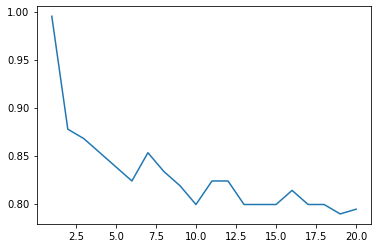

In [94]:
plt.plot(range(1,21),acc)

# Male

In [95]:
male

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
4,Male,19,76000,0
5,Male,27,58000,0
8,Male,25,33000,0
...,...,...,...,...
390,Male,48,33000,1
391,Male,47,23000,1
393,Male,60,42000,1
396,Male,51,23000,1


In [96]:
x = male[['Age', 'Salary']]
y = male[['Purchase Iphone']]

In [97]:
acc = []
for i in range(1,21):
    knn=sn.KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x,y)
    predy=model.predict(x)
    acc.append(sm.accuracy_score(predy,y))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [1.0]
k= 2 [1.0, 0.8979591836734694]
k= 3 [1.0, 0.8979591836734694, 0.8673469387755102]
k= 4 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898]
k= 5 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898]
k= 6 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571]
k= 7 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837]
k= 8 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041]
k= 9 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898]
k= 10 [1.0, 0.8979591836734694, 0.8673469387755102, 0.826530612244898, 0.8826530612244898, 0.8571428571428571, 0.8622448979591837, 0.8469387755102041, 0.826530612244898, 0.826530612244898]

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [98]:
max(acc)

1.0

In [99]:
k = acc.index(max(acc))+1

In [100]:
k

1

In [62]:
knn=sn.KNeighborsClassifier(n_neighbors=1)
model=knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


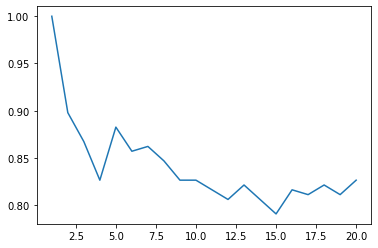

In [101]:
plt.plot(range(1,21),acc)